In [29]:
import tweepy
import csv
import numpy as np
from textblob import TextBlob
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
%matplotlib inline

In [30]:
#inserting Twitter API keys
consumer_key = '1'
consumer_secret = '3'

access_token = '4'
access_token_secret = '5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [31]:
public_tweets = api.search('Google')

threshold = 0
pos_sent_tweets = 0
neg_sent_tweets = 0
for tweet in public_tweets:
	analysis = TextBlob(tweet.text)
	if analysis.sentiment.polarity>=threshold:
		pos_sent_tweets = pos_sent_tweets+1
	else:
		neg_sent_tweets = neg_sent_tweets+1
if pos_sent_tweets>neg_sent_tweets:
	print("overall positive vibes")
else:
	print("negatives vibes bruh")

overall positive vibes


In [32]:
X_train, y_train, X_test, y_test = lstm.load_data('googl.csv',50, True)

In [33]:
model = Sequential()
model.add(LSTM(
            input_dim=1,
            output_dim=50,
            return_sequences=True))
model.add(Dropout(0.2))
    
model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))
    
model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))
    
model.compile(loss='mse',optimizer='rmsprop')

In [45]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)
diff = []
ratio = []
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]-pr))

Train on 1782 samples, validate on 94 samples
Epoch 1/1
1782/1782 [==============================] - 4s - loss: 9.1898e-04 - val_loss: 8.8145e-04


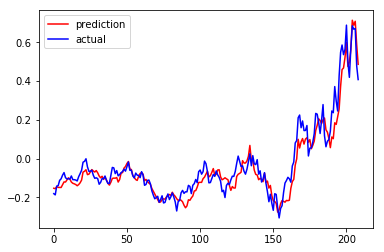

In [46]:
plt.plot(p,color='red',label='prediction')
plt.plot(y_test,color='blue',label='actual')
plt.legend(loc='upper left')
plt.show()